In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from API_Keys import weather_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output CSV file
output_data_file = "resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#GENERATE LIST OF CITIES
#List for holding latitude/longitude and cities
lat_lngs = []
cities = []

#Create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each latitude, longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

605

In [3]:
#MAKE API CALLS - OpenWeatherMap API
url = "http://api.openweathermap.org/data/2.5/weather?"

#specify units as imperial to get Fahrenheit
units = 'imperial'

#set up beginning of url
query_url = f"{url}appid={weather_key}&units={units}&q="

name = []
cntry = []
lat = []
lon = []
temp = []
humid = []
cloud = []
wspd = []
count = 1

#Create for loop to make multiple requests to collect weather information for each city in list
for city in cities:
    
    if count == 1:
        print("Beginning Data Retrieval")
        print("---------------------------------")
    
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing record {count}: City ID={response['id']}, City={response['name']}")
    
        name.append(response['name'])
        cntry.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wspd.append(response['wind']['speed'])
        

    except (KeyError, IndexError):
        print(f"Processing record {count}: Missing city...skipping.")
        
    
    if count == len(cities):
        print("---------------------------------")
        print("Data Retrieval Complete")
        print("---------------------------------")
        
    count = count + 1

Beginning Data Retrieval
---------------------------------
Processing record 1: City ID=5697939, City=North Platte
Processing record 2: City ID=2075265, City=Busselton
Processing record 3: City ID=1015776, City=Bredasdorp
Processing record 4: City ID=5122534, City=Jamestown
Processing record 5: City ID=2729907, City=Longyearbyen
Processing record 6: City ID=3430545, City=Morón
Processing record 7: City ID=1507390, City=Dikson
Processing record 8: City ID=3386931, City=Tamandaré
Processing record 9: City ID=4030556, City=Rikitea
Processing record 10: City ID=3517970, City=Pochutla
Processing record 11: City ID=1847947, City=Shingū
Processing record 12: City ID=4020109, City=Atuona
Processing record 13: City ID=506232, City=Porosozero
Processing record 14: City ID=4003938, City=Jiménez
Processing record 15: City ID=58933, City=Garoowe
Processing record 16: City ID=1649150, City=Bengkulu
Processing record 17: City ID=962367, City=Richards Bay
Processing record 18: City ID=6201424, City=Ma

Processing record 154: City ID=6170031, City=Tuktoyaktuk
Processing record 155: City ID=3372472, City=Vila Franca do Campo
Processing record 156: Missing city...skipping.
Processing record 157: City ID=556275, City=Inzhavino
Processing record 158: City ID=55671, City=Kismayo
Processing record 159: Missing city...skipping.
Processing record 160: City ID=4946620, City=Palmer
Processing record 161: City ID=2514651, City=Los Llanos de Aridane
Processing record 162: City ID=1630789, City=Pontianak
Processing record 163: City ID=3163146, City=Andenes
Processing record 164: City ID=5282297, City=Bethel
Processing record 165: City ID=4686163, City=Dickinson
Processing record 166: City ID=1280037, City=Shache
Processing record 167: City ID=3985168, City=San Patricio
Processing record 168: City ID=5487811, City=Rio Rancho
Processing record 169: City ID=245669, City=Adré
Processing record 170: Missing city...skipping.
Processing record 171: City ID=935215, City=Saint-Philippe
Processing record 17

Processing record 308: City ID=161901, City=Kaka
Processing record 309: City ID=2083537, City=Wewak
Processing record 310: City ID=2101169, City=Aitape
Processing record 311: City ID=1805733, City=Jinchang
Processing record 312: City ID=2654970, City=Brae
Processing record 313: City ID=3466165, City=Cidreira
Processing record 314: Missing city...skipping.
Processing record 315: Missing city...skipping.
Processing record 316: City ID=2377457, City=Nouadhibou
Processing record 317: City ID=5808079, City=Redmond
Processing record 318: Missing city...skipping.
Processing record 319: City ID=4167538, City=Palm Coast
Processing record 320: City ID=1733874, City=Beaufort
Processing record 321: City ID=2222439, City=Rey Bouba
Processing record 322: City ID=2134814, City=Sola
Processing record 323: City ID=924206, City=Phalombe
Processing record 324: City ID=1254832, City=Tawang Town
Processing record 325: City ID=491023, City=Solikamsk
Processing record 326: City ID=4255151, City=Bud
Processin

Processing record 462: City ID=5954718, City=Flin Flon
Processing record 463: City ID=2339937, City=Gusau
Processing record 464: City ID=3435038, City=Dolores
Processing record 465: City ID=6148373, City=Sioux Lookout
Processing record 466: City ID=3685069, City=Durania
Processing record 467: City ID=305681, City=Kumluca
Processing record 468: City ID=303750, City=Nisibis
Processing record 469: City ID=6156245, City=Stephenville Crossing
Processing record 470: City ID=3469437, City=Bom Jesus da Lapa
Processing record 471: City ID=162158, City=Baharly
Processing record 472: City ID=1215502, City=Banda Aceh
Processing record 473: City ID=2997465, City=Loudéac
Processing record 474: City ID=1506676, City=Gari
Processing record 475: City ID=1529484, City=Kumul
Processing record 476: City ID=5877641, City=Wasilla
Processing record 477: City ID=1855540, City=Naze
Processing record 478: Missing city...skipping.
Processing record 479: City ID=3464724, City=Diamantino
Processing record 480: Cit

In [4]:
#Create data frame of information
weather_dict = {
    "city": name,
    "country": cntry,
    "latitude": lat,
    "longitude": lon,
    "temperature": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind speed": wspd
}
weather_data = pd.DataFrame(weather_dict)

#create output file of cities
weather_data.to_csv(output_data_file, index=False, header=True)

In [5]:
#retrieve current date
date = pd.to_datetime('today').strftime("%m/%d/%Y")

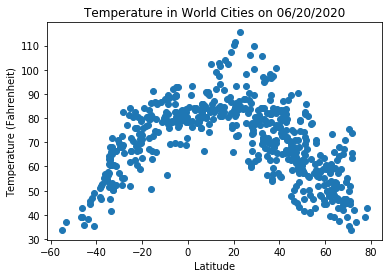

In [6]:
#Scatter plot of latitude vs temperature
plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o")
plt.title(f"Temperature in World Cities on {date}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.savefig("WorldCityTemperature.png")
plt.show()

In [ ]:
# In the plot above (Temperature in World Cities), the temperature for each city is plotted by the latitude for that city.
# This plot shows a curvilinear relationship for temperature and a city's location:  temperatures for cities closer to the
# equator are higher and the farther a city moves away from the equator, temperatures decrease.

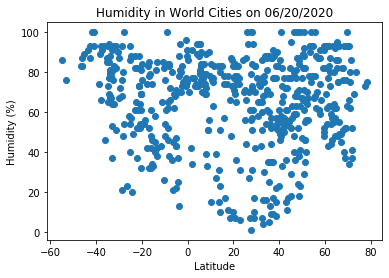

In [7]:
#Scatter plot of latitude vs humidity
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")
plt.title(f"Humidity in World Cities on {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("WorldCityHumidity.png")
plt.show()

In [ ]:
# In the plot above (Humidity in World Cities), the humidity (%) for each city is plotted by the latitude for that city.
# Since the scatter plot does not show any clear patterns, there is a very weak correlation between humidity in relation to
# where a city is located with respect to the equator.

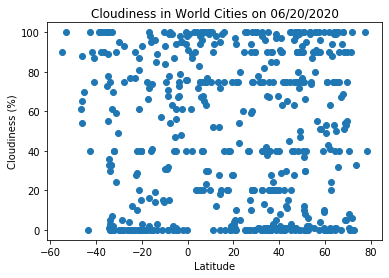

In [8]:
#Scatter plot of latitude vs cloudiness
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")
plt.title(f"Cloudiness in World Cities on {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("WorldCityCloudiness.png")
plt.show()

In [ ]:
# In the plot above (Cloudiness in World Cities), the cloudiness (%) for each city is plotted by the latitude for that city.
# Since the scatter plot does not show any clear patterns, there is a very weak correlation between the amount of cloud cover
# in relation to where a city is located with respect to the equator.

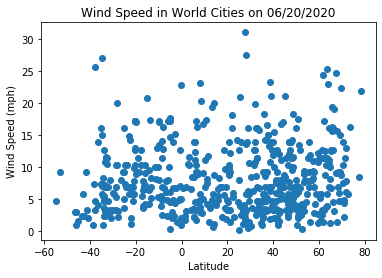

In [9]:
#Scatter plot of latitude vs wind speed
plt.scatter(weather_data["latitude"], weather_data["wind speed"], marker="o")
plt.title(f"Wind Speed in World Cities on {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("WorldCityWindSpeed.png")
plt.show()

In [ ]:
# In the plot above (Wind Speed in World Cities), the wind speed (mph) for each city is plotted by the latitude for that city.
# Since the scatter plot does not show any clear patterns, there is a very weak correlation between wind speed in relation to
# where a city is located with respect to the equator.

In [10]:
#Separate data by hemisphere

#Northern Hemisphere
North_Hem = weather_data.loc[weather_data["latitude"] >= 0, :]
South_Hem = weather_data.loc[weather_data["latitude"] < 0, :]

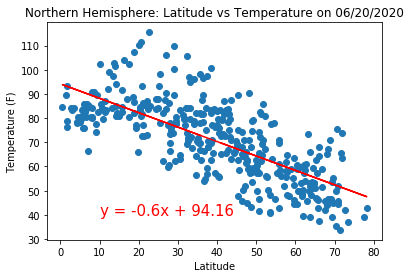

The r-squared is: 0.5274150020519796


In [11]:
#Linear Regressions

#Northern Hemisphere:  Latitude vs Temperature
x_values = North_Hem["latitude"]
y_values = North_Hem["temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs Temperature on {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.savefig("NHLatTemp.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

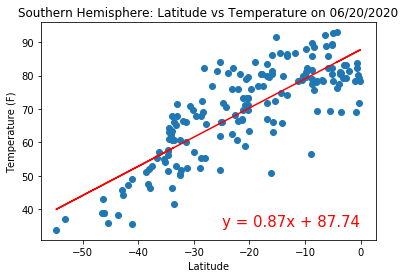

The r-squared is: 0.6690379044245349


In [12]:
#Southern Hemisphere:  Latitude vs Temperature
x_values = South_Hem["latitude"]
y_values = South_Hem["temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs Temperature on {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (-25,35), fontsize=15, color="red")
plt.savefig("SHLatTemp.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
# The two plots above (Latitude vs Temperature by Hemisphere) show there is a relationship between where a city is located and
# temperature.  In the Northern Hemisphere, there is a negative, linear relationship for temperature vs location: temperatures
# decrease as a city's location moves farther north from the equator; temperatures are higher near the equator. In the
# Southern Hemisphere, there is a positive, linear relationship for temperature vs location:  temperatures are highest near
# the equator and decrease as a city's location moves farther south from the equator.

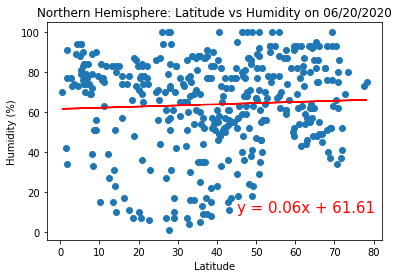

The r-squared is: 0.0023307029352965455


In [13]:
#Northern Hemisphere:  Latitude vs Humidity
x_values = North_Hem["latitude"]
y_values = North_Hem["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs Humidity on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (45,10), fontsize=15, color="red")
plt.savefig("NHLatHumid.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

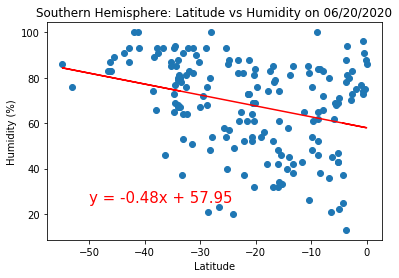

The r-squared is: 0.09655037066363324


In [15]:
#Southern Hemisphere:  Latitude vs Humidity
x_values = South_Hem["latitude"]
y_values = South_Hem["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs Humidity on {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")
plt.savefig("SHLatHumid.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
# The two plots above (Latitude vs Humidity by Hemisphere) show there is essentially no relationship between where a city
# is located and humidity.  In the plot for the Northern Hemisphere, the regression line is nearly flat which indicates
# no relationship - this corresponds to a lack of relationship in the scatter plot in which no patterns emerge.  The
# r-squared value is extremely low; close to zero.  In the plot for the Southern Hemipshere, there appears to be as slight  
# negative correlation between location and humidity but the r-squared value is very low; this along with no clear patterns that
# emerge in the scatter plot also point to no relationship between humidity and location in this hemisphere.

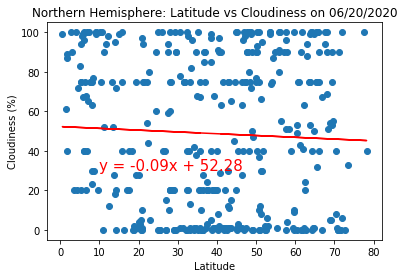

The r-squared is: 0.0021485732325454495


In [16]:
#Northern Hemisphere:  Latitude vs Cloudiness
x_values = North_Hem["latitude"]
y_values = North_Hem["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs Cloudiness on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (10,30), fontsize=15, color="red")
plt.savefig("NHLatCloud.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

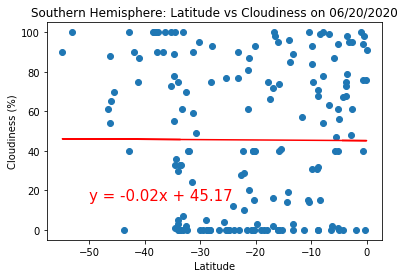

The r-squared is: 3.269203288698569e-05


In [19]:
#Southern Hemisphere:  Latitude vs Cloudiness
x_values = South_Hem["latitude"]
y_values = South_Hem["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs Cloudiness on {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-50,15), fontsize=15, color="red")
plt.savefig("SHLatCloud.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
# The two plots above (Latitude vs Cloudiness by Hemisphere) show there is no relationship between where a city
# is located and cloud cover.  In the plots for both hemispheres, the regression lines are flat or nearly flat which
# indicates no relationship - this corresponds to a lack of relationship in both scatter plots in which no patterns emerge.  
# The r-squared values for both are also extremely low; close to zero.

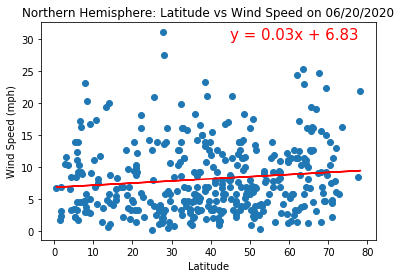

The r-squared is: 0.014132087951468666


In [20]:
#Northern Hemisphere:  Latitude vs Wind Speed
x_values = North_Hem["latitude"]
y_values = North_Hem["wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Northern Hemisphere: Latitude vs Wind Speed on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (45,30), fontsize=15, color="red")
plt.savefig("NHLatWind.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

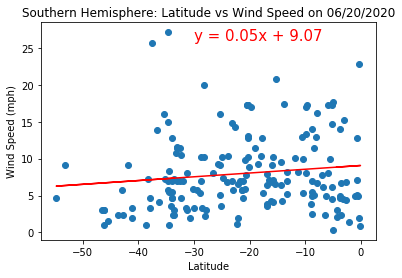

The r-squared is: 0.01674446939234349


In [21]:
#Southern Hemisphere:  Latitude vs Wind Speed
x_values = South_Hem["latitude"]
y_values = South_Hem["wind speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title(f"Southern Hemisphere: Latitude vs Wind Speed on {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-30,26), fontsize=15, color="red")
plt.savefig("SHLatWind.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [ ]:
# The two plots above (Latitude vs Wind Speed by Hemisphere) show that in both hemispheres, there is an extremely weak positive 
# correlation between where a city is located and wind speed.  In the plots for both hemispheres, the regression lines have a
# slight updward slope but given the lack of patterns in the scatter plot data and the low r-squared values for both
# hemispheres, this indicates essentially no relationship between wind speed and where a city is located.